# Damped-Local-Trend(DLT) Example

In [1]:
import pandas as pd
import numpy as np
from orbit.dlt import LGT, DLT
from orbit.utils.utils import plot_predicted_data

## Data

In [2]:
DATA_FILE = "./data/iclaims.example.csv"
DATA_FILE = "./data/DLT_prediction_explode.csv"

In [3]:
# raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])
 raw_df = pd.read_csv(DATA_FILE, parse_dates=['date'])

In [4]:
raw_df.dtypes

key                  object
month_num             int64
value               float64
date         datetime64[ns]
dtype: object

In [5]:
raw_df.head(5)

,key,month_num,value,date
0,M6392,2,7251.1500,1970-01-31
1,M6392,3,6682.9500,1970-02-28
2,M6392,4,6671.2875,1970-03-31
3,M6392,5,5970.2000,1970-04-30
4,M6392,6,6442.5000,1970-05-31


### Data Transformation

In [6]:
df=raw_df.copy()
# df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] = \
#     df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].apply(np.log, axis=1)
df.head(5)

,key,month_num,value,date
0,M6392,2,7251.1500,1970-01-31
1,M6392,3,6682.9500,1970-02-28
2,M6392,4,6671.2875,1970-03-31
3,M6392,5,5970.2000,1970-04-30
4,M6392,6,6442.5000,1970-05-31


### Train / Test Split

In [7]:
test_size=52
train_df=df[:-test_size]

# in uTS we make assertion that test dates need to be between train start/end
test_df=df[-test_size:]

## MAP Fit and Predict

In [8]:
# dlt_map=DLT(
#     response_col='claims',
#     date_col='week',
#     seasonality=52,
#     seed=8888,
#     predict_method='map'
# )
dlt_map=LGT(
    response_col='value',
    date_col='date',
    seasonality=12,
    seed=2019,
    is_rescale=False,
    predict_method='map'
)

In [9]:
dlt_map.fit(df=train_df)

In [10]:
dlt_map.aggregated_posteriors

{'mean': None,
 'median': None,
 'map': {'l': array([[8.45212333, 8.53441919, 8.43863083, 8.18958447, 8.32146861,
          8.2630222 , 8.24358615, 8.37881881, 8.34150007, 8.33553179,
          8.55506298, 8.26406209, 8.15244075, 8.06038459, 8.02390716,
          8.02574486, 8.01826339, 8.03332463, 8.12894045, 8.1330512 ,
          8.06211117, 8.18211894, 8.28154658, 8.2179728 , 8.21881414,
          7.9780892 , 8.01418407, 8.02698714, 7.80604093, 7.76608476,
          7.85362919, 7.83283942, 7.84938238, 7.94204097, 7.77937112,
          8.04045811, 8.21192818, 8.19894029, 8.24667596, 8.23586908,
          8.10004014, 8.17459149, 8.16363903, 8.10120965, 8.19510654,
          8.16586098, 8.44629121, 8.49303619, 8.52848356, 8.6258866 ,
          8.48439893, 8.46699234, 8.36326392, 8.4540519 , 8.39858062,
          8.38123535, 8.42397249, 8.33156983, 8.40790782, 8.39897863,
          8.39069184, 8.59123425, 8.62807654, 8.51368477, 8.54720486,
          8.51569606, 8.39988713, 8.43384418, 

In [11]:
predicted_df = dlt_map.predict(df=test_df)

In [12]:
predicted_df.head(5)

,date,prediction
0,1985-09-30,3660.671430
1,1985-10-31,5108.439320
2,1985-11-30,4289.592338
3,1985-12-31,6883.650906
4,1986-01-31,6602.545426


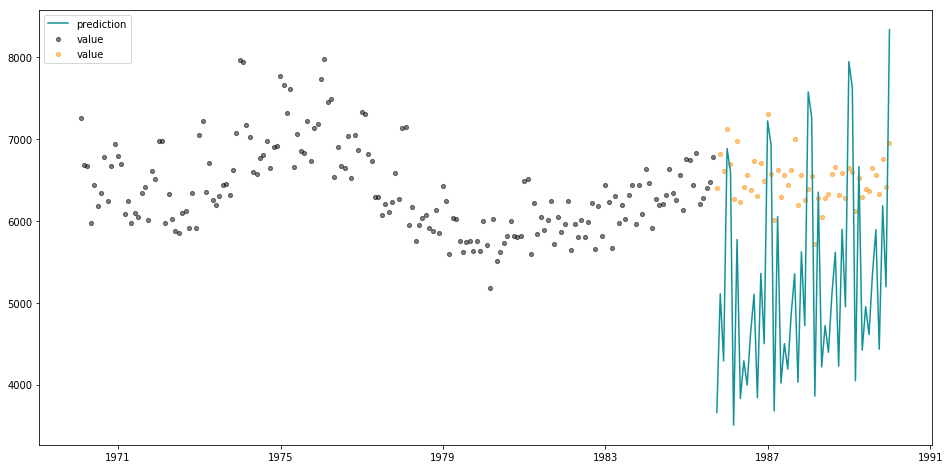

In [13]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_map.date_col, actual_col=dlt_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MCMC Fit and Predict

In [ ]:
dlt_mcmc = DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    num_warmup=4000, 
    num_sample=500,
    sample_method='mcmc',
    predict_method='full',
    n_bootstrap_draws=500
)

In [ ]:
dlt_mcmc.fit(df=train_df)

In [ ]:
predicted_df = dlt_mcmc.predict(df=test_df)

In [ ]:
predicted_df.tail(5)

In [ ]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mcmc.date_col, actual_col=dlt_mcmc.response_col, pred_col=50, 
                    pred_quantiles_col=[5,95], test_actual_df=test_df)

## Mean Fit and Predict Decomp

In [ ]:
dlt_mean=DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='mean'
)

In [ ]:
dlt_mean.fit(df=train_df)

In [ ]:
predicted_df = dlt_mean.predict(df=test_df, decompose=True)

In [ ]:
predicted_df.head(5)

In [ ]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mean.date_col, actual_col=dlt_mean.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MAP Fit and Decomp with Regression

In [ ]:
dlt_reg=DLT(
    response_col='claims',
    regressor_col=['trend.unemploy', 'trend.filling'],
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [ ]:
dlt_reg.fit(df=train_df)

In [ ]:
predicted_df = dlt_reg.predict(df=test_df, decompose=True)

In [ ]:
predicted_df.head(5)